<a href="https://colab.research.google.com/github/AyrllanP/PISI-3/blob/dev-2/modelos_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest



In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


file_url = "https://raw.githubusercontent.com/AyrllanP/PISI-3/main/Wellbeing_and_lifestyle_data_Kaggle.csv"
df = pd.read_csv(file_url)
df.head()

df.isnull().sum()
# Substituindo string da coluna 'DAILY_STRESS' por um valor numérico correspondente a mediana dos demais valores
df['DAILY_STRESS'] = df['DAILY_STRESS'].replace("1/1/00", 3)
df['DAILY_STRESS'] = df['DAILY_STRESS'].astype(int)
# Substituindo os valores de estresse na coluna 'DAILY_STRESS'
df['DAILY_STRESS'] = df['DAILY_STRESS'].replace({0: 'baixo', 1: 'baixo', 2: 'moderado', 3: 'moderado', 4: 'alto', 5: 'alto'})
# Ignorando colunas inúteis
df = df.drop(["Timestamp"], axis=1, errors='ignore')
# Substituindo por números os valores de 'DAILY_STRESS'
df['DAILY_STRESS'] = df['DAILY_STRESS'].replace({'baixo': 0,'moderado': 1, 'alto': 2})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FRUITS_VEGGIES           15972 non-null  int64  
 1   DAILY_STRESS             15972 non-null  int64  
 2   PLACES_VISITED           15972 non-null  int64  
 3   CORE_CIRCLE              15972 non-null  int64  
 4   SUPPORTING_OTHERS        15972 non-null  int64  
 5   SOCIAL_NETWORK           15972 non-null  int64  
 6   ACHIEVEMENT              15972 non-null  int64  
 7   DONATION                 15972 non-null  int64  
 8   BMI_RANGE                15972 non-null  int64  
 9   TODO_COMPLETED           15972 non-null  int64  
 10  FLOW                     15972 non-null  int64  
 11  DAILY_STEPS              15972 non-null  int64  
 12  LIVE_VISION              15972 non-null  int64  
 13  SLEEP_HOURS              15972 non-null  int64  
 14  LOST_VACATION         

<ipython-input-1-eb07d103586f>:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DAILY_STRESS'] = df['DAILY_STRESS'].replace({'baixo': 0,'moderado': 1, 'alto': 2})


Resultados do Conjunto de Treino (Random Forest):
              precision    recall  f1-score   support

       Baixo       0.87      0.30      0.45      2525
    Moderado       0.63      0.95      0.76      6227
        Alto       0.86      0.55      0.67      4025

    accuracy                           0.70     12777
   macro avg       0.79      0.60      0.63     12777
weighted avg       0.75      0.70      0.67     12777

Acurácia do Random Forest (Treino): 0.70


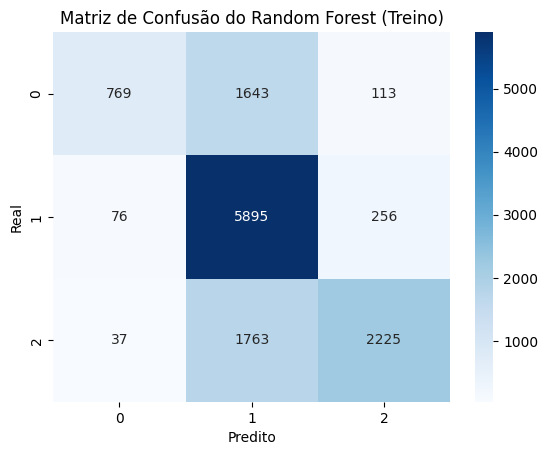

In [ ]:
# Codificação de variáveis categóricas
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['GENDER', 'AGE'])], remainder='passthrough')
X = np.array(ct.fit_transform(df.drop('DAILY_STRESS', axis=1)))
y = df['DAILY_STRESS']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo Random Forest com hiperparâmetros ajustados
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Número de árvores
    max_depth=10,      # Profundidade máxima das árvores
    min_samples_leaf=5,  # Número mínimo de amostras por folha
    random_state=42
)

# Treinando o modelo
rf_classifier.fit(X_train, y_train)

# Avaliando no conjunto de treino
y_train_pred = rf_classifier.predict(X_train)
print("Resultados do Conjunto de Treino (Random Forest):")
print(classification_report(y_train, y_train_pred, target_names=['Baixo', 'Moderado', 'Alto']))
print(f'Acurácia do Random Forest (Treino): {accuracy_score(y_train, y_train_pred):.2f}')

# Matriz de confusão para os dados de treino
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão do Random Forest (Treino)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


Resultados do Conjunto de Teste (Random Forest):
              precision    recall  f1-score   support

       Baixo       0.59      0.14      0.23       629
    Moderado       0.55      0.84      0.66      1579
        Alto       0.62      0.41      0.49       987

    accuracy                           0.57      3195
   macro avg       0.59      0.46      0.46      3195
weighted avg       0.58      0.57      0.52      3195

Acurácia do Random Forest (Teste): 0.57


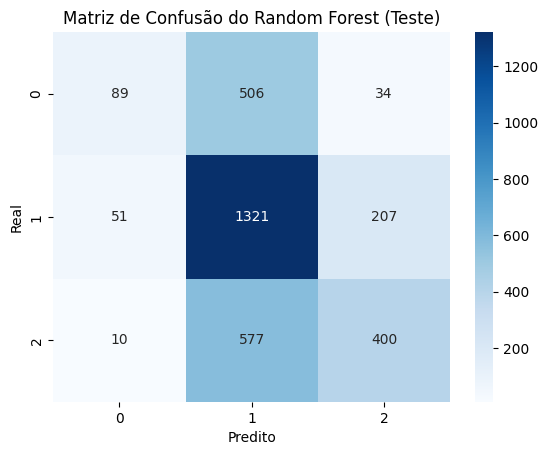

In [ ]:
# Avaliando no conjunto de teste
y_test_pred = rf_classifier.predict(X_test)
print("Resultados do Conjunto de Teste (Random Forest):")
print(classification_report(y_test, y_test_pred, target_names=['Baixo', 'Moderado', 'Alto']))
print(f'Acurácia do Random Forest (Teste): {accuracy_score(y_test, y_test_pred):.2f}')

# Matriz de confusão para os dados de teste
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão do Random Forest (Teste)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Validação cruzada para avaliar a generalização do modelo
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f'Acurácia média na validação cruzada: {cv_scores.mean():.2f}')

Acurácia média na validação cruzada: 0.56


# KNN (k-nearest neighbors)

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

file_url = "https://raw.githubusercontent.com/AyrllanP/PISI-3/main/Wellbeing_and_lifestyle_data_Kaggle.csv"
df = pd.read_csv(file_url)
df.head()

df.isnull().sum()
# Substituindo string da coluna 'DAILY_STRESS' por um valor numérico correspondente a mediana dos demais valores
df['DAILY_STRESS'] = df['DAILY_STRESS'].replace("1/1/00", 3)
df['DAILY_STRESS'] = df['DAILY_STRESS'].astype(int)
# Substituindo os valores de estresse na coluna 'DAILY_STRESS'
df['DAILY_STRESS'] = df['DAILY_STRESS'].replace({0: 'baixo', 1: 'baixo', 2: 'moderado', 3: 'moderado', 4: 'alto', 5: 'alto'})
# Ignorando colunas inúteis
df = df.drop(["Timestamp"], axis=1, errors='ignore')
# Substituindo por números os valores de 'DAILY_STRESS'
df['DAILY_STRESS'] = df['DAILY_STRESS'].replace({'baixo': 0,'moderado': 1, 'alto': 2})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FRUITS_VEGGIES           15972 non-null  int64  
 1   DAILY_STRESS             15972 non-null  int64  
 2   PLACES_VISITED           15972 non-null  int64  
 3   CORE_CIRCLE              15972 non-null  int64  
 4   SUPPORTING_OTHERS        15972 non-null  int64  
 5   SOCIAL_NETWORK           15972 non-null  int64  
 6   ACHIEVEMENT              15972 non-null  int64  
 7   DONATION                 15972 non-null  int64  
 8   BMI_RANGE                15972 non-null  int64  
 9   TODO_COMPLETED           15972 non-null  int64  
 10  FLOW                     15972 non-null  int64  
 11  DAILY_STEPS              15972 non-null  int64  
 12  LIVE_VISION              15972 non-null  int64  
 13  SLEEP_HOURS              15972 non-null  int64  
 14  LOST_VACATION         

<ipython-input-7-1880aff3e886>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DAILY_STRESS'] = df['DAILY_STRESS'].replace({'baixo': 0,'moderado': 1, 'alto': 2})


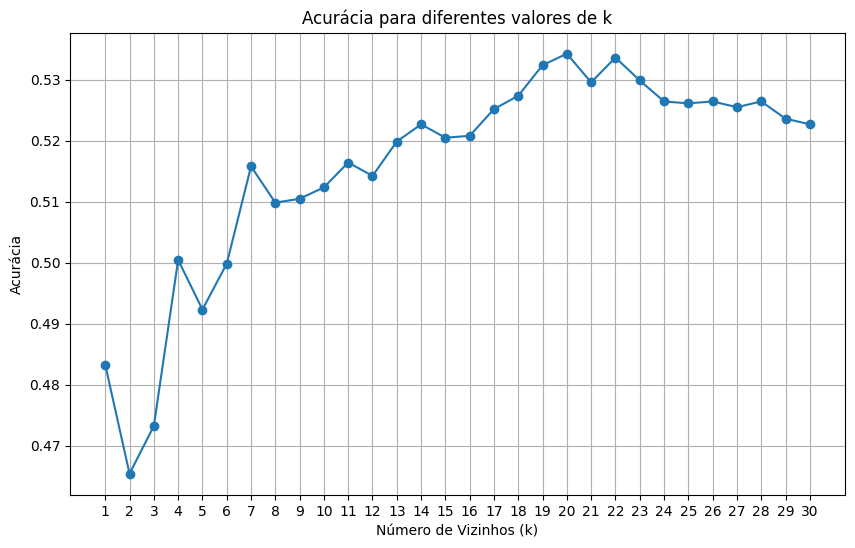

In [ ]:
# Codificação de variáveis categóricas
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['GENDER', 'AGE'])], remainder='passthrough')
X = np.array(ct.fit_transform(df.drop('DAILY_STRESS', axis=1)))
y = df['DAILY_STRESS'].values

# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

# Testando diferentes valores de k
accuracies = []
for k in range(1, 31):  # Teste para k de 1 a 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotando a acurácia para diferentes valores de k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), accuracies, marker='o')
plt.xticks(range(1, 31))
plt.title("Acurácia para diferentes valores de k")
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Acurácia")
plt.grid()
plt.show()

Métricas no conjunto de treino:
Acurácia: 0.57

Matriz de Confusão:
 [[ 556 1850  119]
 [ 285 5503  439]
 [ 133 2694 1198]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.57      0.22      0.32      2525
           1       0.55      0.88      0.68      6227
           2       0.68      0.30      0.41      4025

    accuracy                           0.57     12777
   macro avg       0.60      0.47      0.47     12777
weighted avg       0.59      0.57      0.52     12777



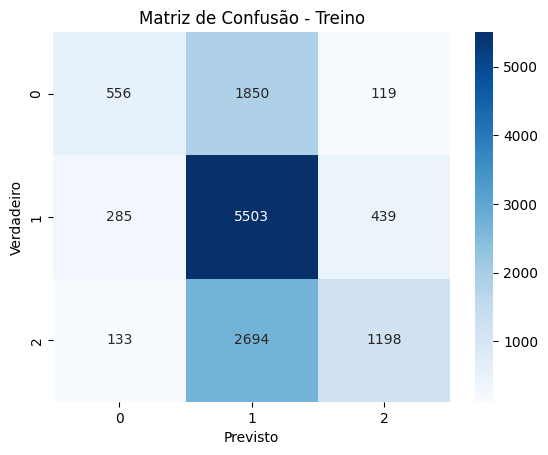

In [ ]:
# Treinando o modelo KNN com o melhor k (por exemplo, k=20)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

# Previsões no conjunto de treino
y_pred_train = knn.predict(X_train)


# Avaliando o modelo no conjunto de treino
accuracy_train = accuracy_score(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)



# Exibindo as métricas de avaliação no conjunto de treino
print("Métricas no conjunto de treino:")
print(f"Acurácia: {accuracy_train:.2f}")
print("\nMatriz de Confusão:\n", conf_matrix_train)
print("\nRelatório de Classificação:\n", class_report_train)

# Plotando a matriz de confusão para o conjunto de treino
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Treino")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()



Métricas no conjunto de teste:
Acurácia: 0.53

Matriz de Confusão:
 [[  92  506   31]
 [  87 1357  135]
 [  28  701  258]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.44      0.15      0.22       629
           1       0.53      0.86      0.66      1579
           2       0.61      0.26      0.37       987

    accuracy                           0.53      3195
   macro avg       0.53      0.42      0.41      3195
weighted avg       0.54      0.53      0.48      3195



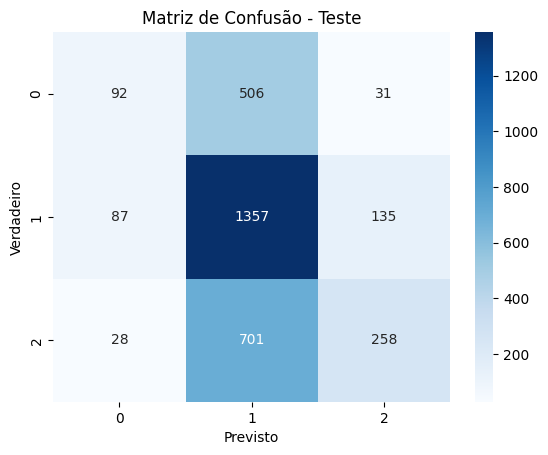

In [ ]:
# Previsões no conjunto de treino e teste
y_pred_test = knn.predict(X_test)

# Avaliando o modelo no conjunto de teste
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

# Exibindo as métricas de avaliação no conjunto de teste
print("\nMétricas no conjunto de teste:")
print(f"Acurácia: {accuracy_test:.2f}")
print("\nMatriz de Confusão:\n", conf_matrix_test)
print("\nRelatório de Classificação:\n", class_report_test)

# Plotando a matriz de confusão para o conjunto de teste
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Teste")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()


# SVM (Support Vector Machine)

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando os dados
file_url = "https://raw.githubusercontent.com/AyrllanP/PISI-3/main/Wellbeing_and_lifestyle_data_Kaggle.csv"
data = pd.read_csv(file_url)

# Pré-processamento dos dados
data['DAILY_STRESS'] = data['DAILY_STRESS'].replace("1/1/00", 3)
data['DAILY_STRESS'] = data['DAILY_STRESS'].astype(int)
data['DAILY_STRESS'] = data['DAILY_STRESS'].replace({0: 'baixo', 1: 'baixo', 2: 'moderado', 3: 'moderado', 4: 'alto', 5: 'alto'})

# Remoção de colunas irrelevantes
data = data.drop(["Timestamp"], axis=1, errors='ignore')

# Codificação de variáveis categóricas
data['DAILY_STRESS'] = data['DAILY_STRESS'].replace({'baixo': 0, 'moderado': 1, 'alto': 2})
data['GENDER'] = data['GENDER'].replace({'Male': 0, 'Female': 1})
data['AGE'] = data['AGE'].replace({'Less than 20': 0, '21 to 35': 1, '36 to 50': 2, '51 or more': 3})

# Separando features (X) e target (y)
X = data.drop(columns=['DAILY_STRESS']).values
y = data['DAILY_STRESS'].values

<ipython-input-2-23a313badd4c>:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['DAILY_STRESS'] = data['DAILY_STRESS'].replace({'baixo': 0, 'moderado': 1, 'alto': 2})
<ipython-input-2-23a313badd4c>:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['GENDER'] = data['GENDER'].replace({'Male': 0, 'Female': 1})
<ipython-input-2-23a313badd4c>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)

In [ ]:
# Dividir dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar modelo SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Kernel RBF para melhor performance
svm_model.fit(X_train, y_train)

# Fazer previsões no conjunto de treino e teste
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)


Métricas no conjunto de treino:
Acurácia: 0.7773

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.47      0.62      2525
           1       0.70      0.94      0.81      6227
           2       0.92      0.71      0.80      4025

    accuracy                           0.78     12777
   macro avg       0.85      0.71      0.74     12777
weighted avg       0.81      0.78      0.77     12777


Matriz de Confusão:
 [[1179 1338    8]
 [  94 5877  256]
 [   3 1147 2875]]


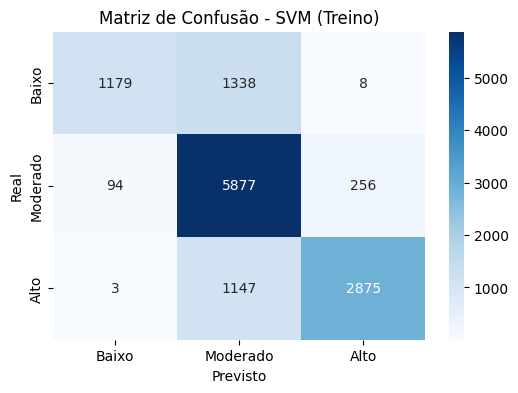

In [ ]:
# Avaliar o modelo no conjunto de treino
accuracy_train = accuracy_score(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)

# Exibindo as métricas de avaliação no conjunto de treino
print("Métricas no conjunto de treino:")
print(f"Acurácia: {accuracy_train:.4f}")
print("\nRelatório de Classificação:\n", class_report_train)
print("\nMatriz de Confusão:\n", conf_matrix_train)

# Plotando a matriz de confusão para o conjunto de treino
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", xticklabels=['Baixo', 'Moderado', 'Alto'], yticklabels=['Baixo', 'Moderado', 'Alto'])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM (Treino)")
plt.show()



Métricas no conjunto de teste:
Acurácia: 0.6867

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.29      0.43       629
           1       0.63      0.89      0.74      1579
           2       0.81      0.61      0.70       987

    accuracy                           0.69      3195
   macro avg       0.75      0.60      0.62      3195
weighted avg       0.72      0.69      0.67      3195


Matriz de Confusão:
 [[ 181  440    8]
 [  38 1406  135]
 [   2  378  607]]


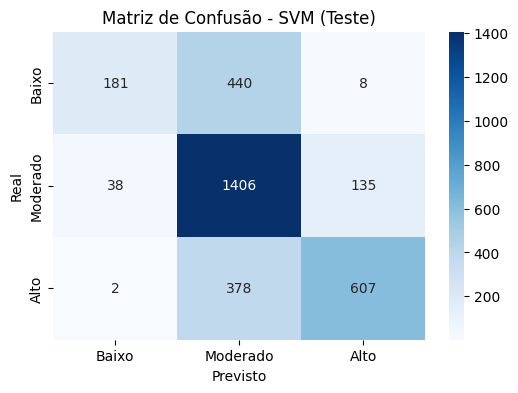

In [ ]:

# Avaliar o modelo no conjunto de teste
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

# Exibindo as métricas de avaliação no conjunto de teste
print("\nMétricas no conjunto de teste:")
print(f"Acurácia: {accuracy_test:.4f}")
print("\nRelatório de Classificação:\n", class_report_test)
print("\nMatriz de Confusão:\n", conf_matrix_test)

# Plotando a matriz de confusão para o conjunto de teste
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Baixo', 'Moderado', 'Alto'], yticklabels=['Baixo', 'Moderado', 'Alto'])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM (Teste)")
plt.show()

## Aplicando SHAP ao SVM


In [ ]:
!pip install shap

In [ ]:
import shap
# Criar o explainer para o modelo SVM
background = shap.sample(X_train, 100)  # Usar 100 amostras como fundo
explainer = shap.KernelExplainer(svm_model.predict, background)

In [ ]:
# Calcular os valores SHAP para uma amostra do conjunto de teste
X_test_sample = X_test[:100]
shap_values = explainer.shap_values(X_test_sample, n_jobs=-1)


  0%|          | 0/100 [00:00<?, ?it/s]

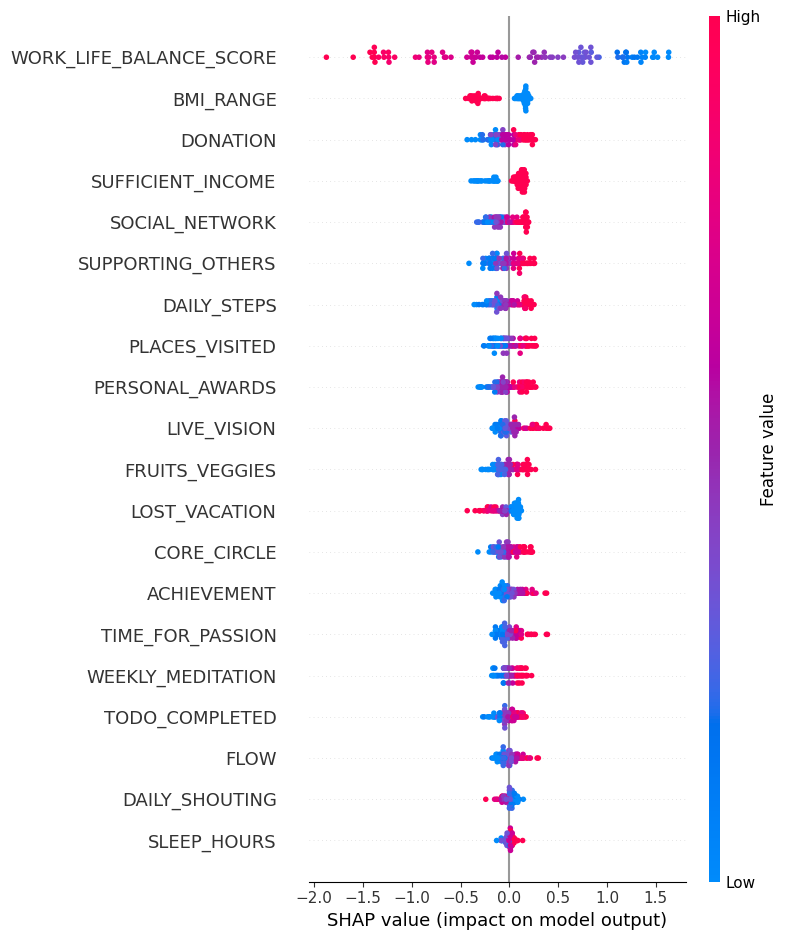

In [ ]:
# Importância global
shap.summary_plot(shap_values, X_test_sample, feature_names=data.drop(columns=['DAILY_STRESS']).columns)

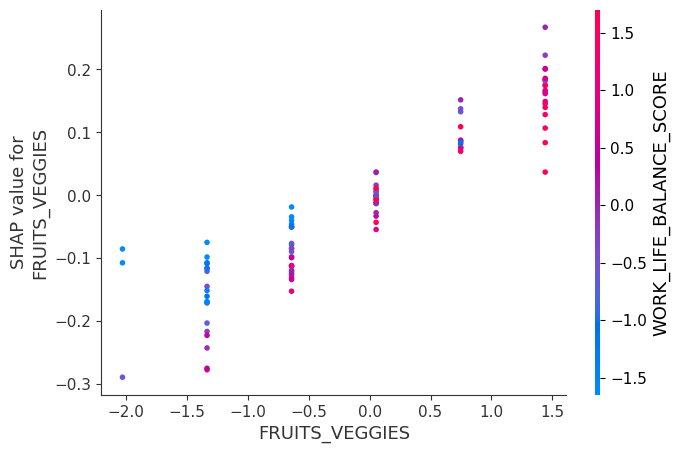

In [ ]:
# Dependência
shap.dependence_plot(0, shap_values, X_test_sample, feature_names=data.drop(columns=['DAILY_STRESS']).columns)

In [ ]:
# Inicializar a biblioteca JavaScript do SHAP
shap.initjs()

# Decisão individual
shap.force_plot(explainer.expected_value, shap_values[0], X_test[0], feature_names=data.drop(columns=['DAILY_STRESS']).columns)

In [ ]:
# Inicializar a biblioteca JavaScript do SHAP
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test, feature_names=data.drop(columns=['DAILY_STRESS']).columns)

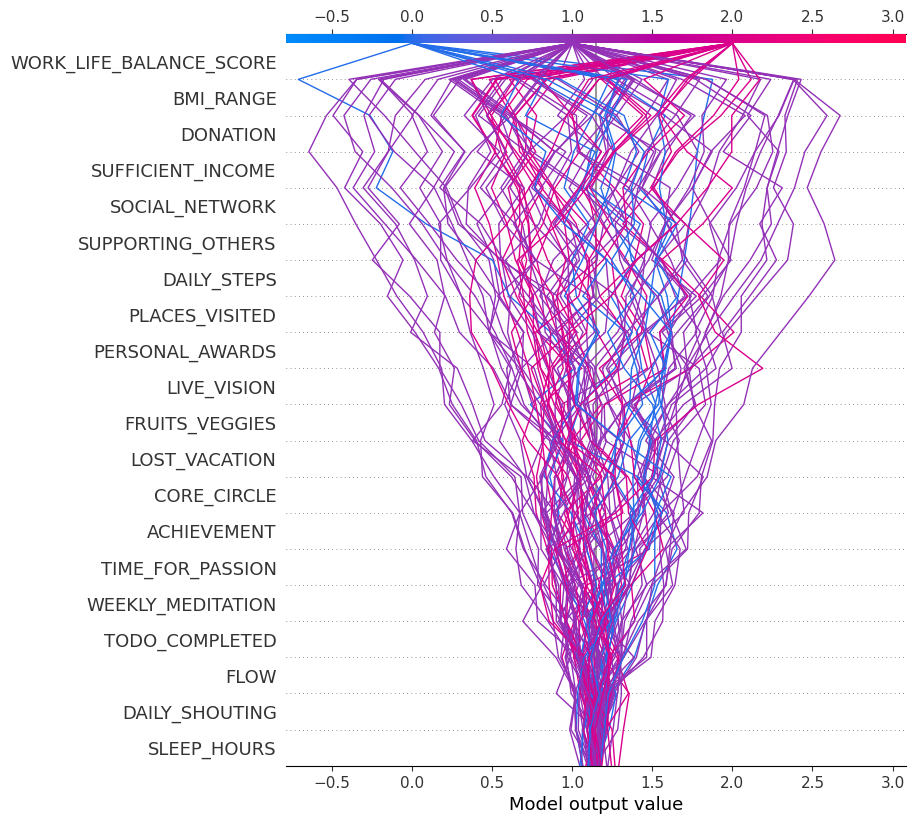

In [ ]:
shap.decision_plot(
    explainer.expected_value,
    shap_values,
    X_test,
    feature_names=data.drop(columns=['DAILY_STRESS']).columns.tolist()
)

# Smoting

<ipython-input-1-a8f988bcd9cc>:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['DAILY_STRESS'] = data['DAILY_STRESS'].replace({'baixo': 0, 'moderado': 1, 'alto': 2})
<ipython-input-1-a8f988bcd9cc>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['GENDER'] = data['GENDER'].replace({'Male': 0, 'Female': 1})
<ipython-input-1-a8f988bcd9cc>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)

Métricas no conjunto de treino:
Acurácia: 0.9064

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      6227
           1       0.86      0.86      0.86      6227
           2       0.93      0.92      0.92      6227

    accuracy                           0.91     18681
   macro avg       0.91      0.91      0.91     18681
weighted avg       0.91      0.91      0.91     18681


Matriz de Confusão:
 [[5833  392    2]
 [ 427 5382  418]
 [   5  505 5717]]


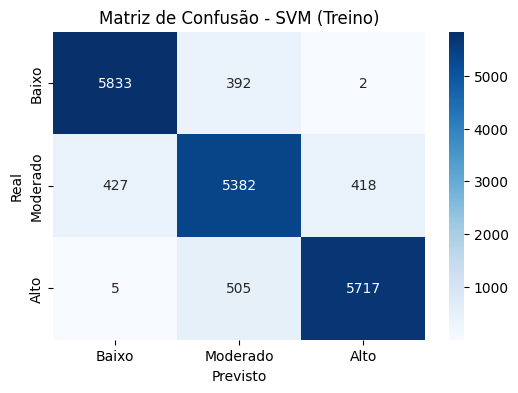


Métricas no conjunto de teste:
Acurácia: 0.7368

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69       629
           1       0.73      0.76      0.74      1579
           2       0.78      0.74      0.76       987

    accuracy                           0.74      3195
   macro avg       0.73      0.73      0.73      3195
weighted avg       0.74      0.74      0.74      3195


Matriz de Confusão:
 [[ 425  202    2]
 [ 183 1194  202]
 [   3  249  735]]


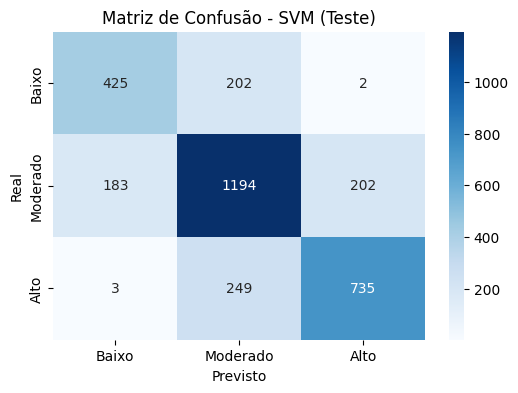

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # Importando SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando os dados
file_url = "https://raw.githubusercontent.com/AyrllanP/PISI-3/main/Wellbeing_and_lifestyle_data_Kaggle.csv"
data = pd.read_csv(file_url)

# Pré-processamento dos dados
data['DAILY_STRESS'] = data['DAILY_STRESS'].replace("1/1/00", 3)
data['DAILY_STRESS'] = data['DAILY_STRESS'].astype(int)
data['DAILY_STRESS'] = data['DAILY_STRESS'].replace({0: 'baixo', 1: 'baixo', 2: 'moderado', 3: 'moderado', 4: 'alto', 5: 'alto'})

# Remoção de colunas irrelevantes
data = data.drop(["Timestamp"], axis=1, errors='ignore')

# Codificação de variáveis categóricas
data['DAILY_STRESS'] = data['DAILY_STRESS'].replace({'baixo': 0, 'moderado': 1, 'alto': 2})
data['GENDER'] = data['GENDER'].replace({'Male': 0, 'Female': 1})
data['AGE'] = data['AGE'].replace({'Less than 20': 0, '21 to 35': 1, '36 to 50': 2, '51 or more': 3})

# Separando features (X) e target (y)
X = data.drop(columns=['DAILY_STRESS']).values
y = data['DAILY_STRESS'].values

# Dividir dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE apenas no conjunto de treino
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalizar os dados
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Treinar modelo SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Kernel RBF para melhor performance
svm_model.fit(X_train_resampled, y_train_resampled)

# Fazer previsões no conjunto de treino e teste
y_pred_train = svm_model.predict(X_train_resampled)
y_pred_test = svm_model.predict(X_test)

# Avaliar o modelo no conjunto de treino
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
conf_matrix_train = confusion_matrix(y_train_resampled, y_pred_train)
class_report_train = classification_report(y_train_resampled, y_pred_train)

# Exibindo as métricas de avaliação no conjunto de treino
print("Métricas no conjunto de treino:")
print(f"Acurácia: {accuracy_train:.4f}")
print("\nRelatório de Classificação:\n", class_report_train)
print("\nMatriz de Confusão:\n", conf_matrix_train)

# Plotando a matriz de confusão para o conjunto de treino
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", xticklabels=['Baixo', 'Moderado', 'Alto'], yticklabels=['Baixo', 'Moderado', 'Alto'])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM (Treino)")
plt.show()

# Avaliar o modelo no conjunto de teste
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

# Exibindo as métricas de avaliação no conjunto de teste
print("\nMétricas no conjunto de teste:")
print(f"Acurácia: {accuracy_test:.4f}")
print("\nRelatório de Classificação:\n", class_report_test)
print("\nMatriz de Confusão:\n", conf_matrix_test)

# Plotando a matriz de confusão para o conjunto de teste
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Baixo', 'Moderado', 'Alto'], yticklabels=['Baixo', 'Moderado', 'Alto'])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM (Teste)")
plt.show()